In [3]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

# Charger le fichier
file = "motor_data14-2018.csv"
df = pd.read_csv(file)

# Afficher les premières lignes du dataset
df.head()


Saving motor_data14-2018.csv to motor_data14-2018.csv


,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,0,08-AUG-17,07-AUG-18,08,1202,519755.22,5097.83,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
1,0,08-AUG-16,07-AUG-17,08,1202,519755.22,6556.52,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
2,0,08-AUG-15,07-AUG-16,08,1202,519755.22,6556.52,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
3,0,08-AUG-14,07-AUG-15,08,1202,519755.22,5102.83,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
4,0,08-AUG-17,07-AUG-18,08,1202,1400000.00,13304.87,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,NaN


In [4]:
# Convertir les dates au format standard YYYY-MM-DD
df['INSR_BEGIN'] = pd.to_datetime(df['INSR_BEGIN'], format='%d-%b-%y', errors='coerce')
df['INSR_END'] = pd.to_datetime(df['INSR_END'], format='%d-%b-%y', errors='coerce')

# Convertir SEX en catégories lisibles
df['SEX'] = df['SEX'].map({0: 'Homme', 1: 'Femme'})

# Convertir EFFECTIVE_YR en entier
df['EFFECTIVE_YR'] = pd.to_numeric(df['EFFECTIVE_YR'], errors='coerce')

# Vérifier les modifications apportées
df.head()


,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,Homme,2017-08-08,2018-08-07,8.0,1202,519755.22,5097.83,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
1,Homme,2016-08-08,2017-08-07,8.0,1202,519755.22,6556.52,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
2,Homme,2015-08-08,2016-08-07,8.0,1202,519755.22,6556.52,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
3,Homme,2014-08-08,2015-08-07,8.0,1202,519755.22,5102.83,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
4,Homme,2017-08-08,2018-08-07,8.0,1202,1400000.00,13304.87,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,NaN


In [5]:
# Vérifier les valeurs manquantes par colonne
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0
SEX,43635
EFFECTIVE_YR,643
PREMIUM,13
PROD_YEAR,63
SEATS_NUM,95
CARRYING_CAPACITY,116834
CCM_TON,6
MAKE,5
CLAIM_PAID,470727


In [6]:
# SEX : Remplacer par la valeur la plus fréquente (mode)
df.loc[:, 'SEX'] = df['SEX'].fillna(df['SEX'].mode()[0])

# MAKE : Remplacer par la valeur la plus fréquente
df.loc[:, 'MAKE'] = df['MAKE'].fillna(df['MAKE'].mode()[0])

# PROD_YEAR : Remplacer par la médiane
df.loc[:, 'PROD_YEAR'] = df['PROD_YEAR'].fillna(df['PROD_YEAR'].median())

# SEATS_NUM : Remplacer par la médiane
df.loc[:, 'SEATS_NUM'] = df['SEATS_NUM'].fillna(df['SEATS_NUM'].median())

# EFFECTIVE_YR, PREMIUM, CCM_TON : Remplacer par la médiane
df.loc[:, 'EFFECTIVE_YR'] = df['EFFECTIVE_YR'].fillna(df['EFFECTIVE_YR'].median())
df.loc[:, 'PREMIUM'] = df['PREMIUM'].fillna(df['PREMIUM'].median())
df.loc[:, 'CCM_TON'] = df['CCM_TON'].fillna(df['CCM_TON'].median())

# CLAIM_PAID : Remplacer NaN par 0
df.loc[:, 'CLAIM_PAID'] = df['CLAIM_PAID'].fillna(0)

# Vérifier les valeurs manquantes après correction
df.isnull().sum()


,0
SEX,0
INSR_BEGIN,0
INSR_END,0
EFFECTIVE_YR,0
INSR_TYPE,0
INSURED_VALUE,0
PREMIUM,0
OBJECT_ID,0
PROD_YEAR,0
SEATS_NUM,0


In [7]:
#on supprime la colonne avec trop de données manquantes

df.drop(columns=['CARRYING_CAPACITY'], inplace=True)


In [8]:
df.to_csv("cleaneddatasetvehicle.csv", index=False)

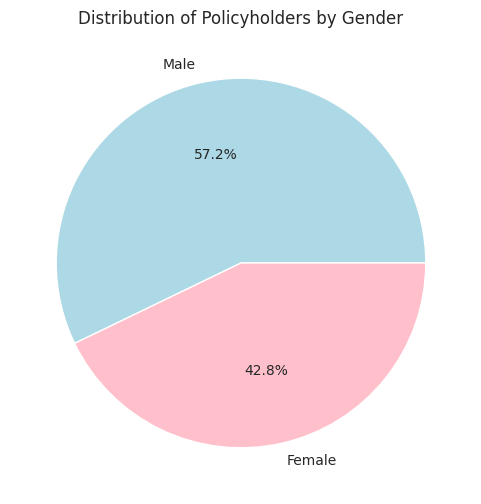

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer le style
sns.set_style("whitegrid")

# Répartition des assurés par sexe (Camembert)
plt.figure(figsize=(6, 6))
df['SEX'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'], labels=["Male", "Female"])
plt.title("Distribution of Policyholders by Gender")
plt.ylabel('')
plt.show()


In [10]:

# Appliquer un style sombre mais moins contrasté
sns.set_style("darkgrid")
plt.style.use("seaborn-darkgrid")  # Fond gris foncé au lieu de noir total

plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    y='MAKE',
    order=df['MAKE'].value_counts().index[:10],
    palette="magma"
)

plt.title("Top 10 Insured Vehicle Brands", color='white')
plt.xlabel("Number of Insured Vehicles", color='white')
plt.ylabel("Vehicle Brand", color='white')

# Assurer la lisibilité des axes
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()


OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

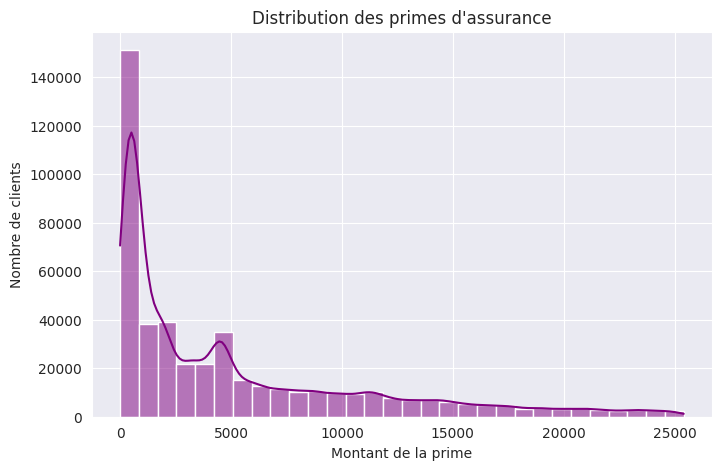

In [11]:
#suppression des valeurs extremes dans la colonne premium

Q1 = df['PREMIUM'].quantile(0.25)
Q3 = df['PREMIUM'].quantile(0.75)
IQR = Q3 - Q1

# Définir les seuils
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes
df_filtered = df[(df['PREMIUM'] >= lower_bound) & (df['PREMIUM'] <= upper_bound)]

# Afficher l'histogramme avec les données filtrées
plt.figure(figsize=(8, 5))
sns.histplot(df_filtered['PREMIUM'], bins=30, kde=True, color='purple')
plt.title("Distribution des primes d'assurance")
plt.xlabel("Montant de la prime")
plt.ylabel("Nombre de clients")
plt.show()

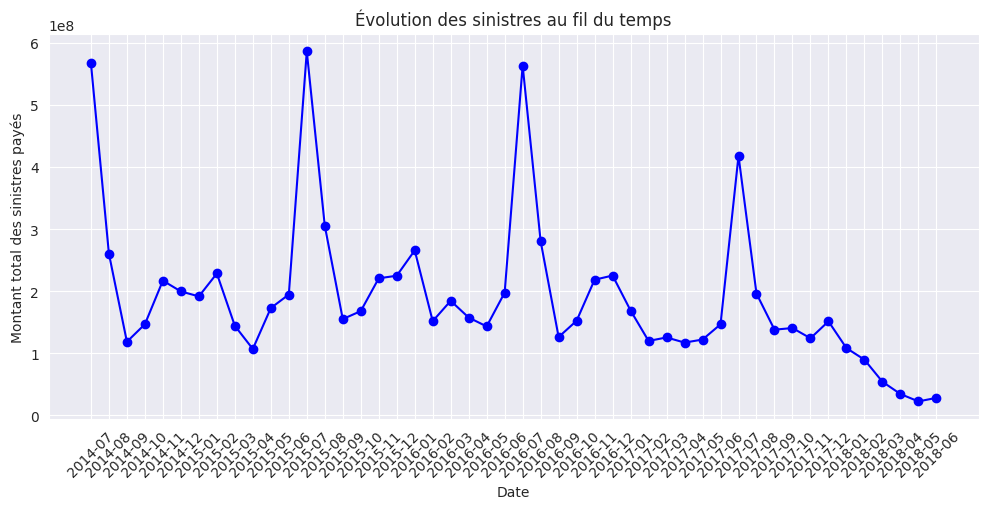

In [12]:
# Évolution des sinistres au fil du temps (Courbe temporelle)
df['INSR_BEGIN'] = pd.to_datetime(df['INSR_BEGIN'])
df_claims = df.groupby(df['INSR_BEGIN'].dt.to_period("M"))['CLAIM_PAID'].sum()

plt.figure(figsize=(12, 5))
plt.plot(df_claims.index.astype(str), df_claims.values, marker='o', linestyle='-', color='blue')
plt.xticks(rotation=45)
plt.title("Évolution des sinistres au fil du temps")
plt.xlabel("Date")
plt.ylabel("Montant total des sinistres payés")
plt.show()

On peut voir dans le dernier graph que les sinistres liés aux voitures sont beaucoup plus élevés en juillet/aout (vacances d'été)